In [8]:
import numpy as np
import datetime
import pytz
import matplotlib.pyplot as plt

In [9]:
# Temporary block to combine individual files since my parsing failed part of the way through ;-;
articlesEN = np.load("../data/articlesEN.npy", allow_pickle=True)
articlesRU = np.load("../data/articlesRU.npy", allow_pickle=True)
articlesZH = np.load("../data/articlesZH.npy", allow_pickle=True)

abvs = ["en", "ru", "zh"]
article_dicts = [articlesEN, articlesRU, articlesZH]
articles = {}

for i in range(len(abvs)):
  abv = abvs[i]
  article_dict = article_dicts[i]
  filtered_articles = []
  for article in article_dict:
    if len(article["text"]) > 100:
      filtered_dict = {"url": article["url"], "title": article["title"], 
                     "authors": article["authors"], "date": article["date"],
                     "text": article["text"]}
      filtered_articles.append(filtered_dict)
  articles[abv] = filtered_articles
  print("Number of " + abv + " articles:" + str(len(filtered_articles)))

  np.save("../data/articles.npy", articles)

Number of en articles:1906
Number of ru articles:1431
Number of zh articles:9627


In [10]:
articles = np.load("../data/articles.npy", allow_pickle=True).item()
utc=pytz.UTC

# Find the date range of articles
datetimes = []
for abv, article_list in articles.items():
  for article in article_list:
    if article["date"] != None:
      datetimes.append(article["date"].replace(tzinfo=utc))

print(min(datetimes), max(datetimes))

2004-02-19 00:00:00+00:00 2022-05-31 00:00:00+00:00


In [11]:
# Example files from 4/14/22 meeting
#print(articles["en"][1000])
#print(articles["ru"][1000])
#print(articles["zh"][1000])

Combined 9390
English articles 907
Russian articles 1302
Chinese articles 7181


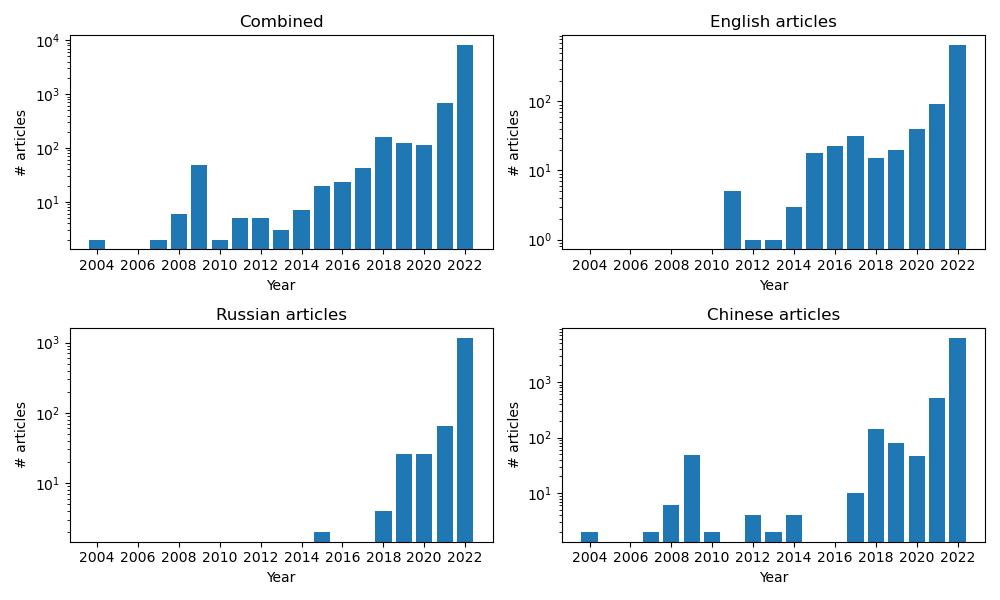

In [28]:
# Plot number of articles vs. year for all articles and seperated by langauge
fig = plt.figure(figsize=(10, 6))
article_sets = [articles["en"] + articles["ru"] + articles["zh"], articles["en"], articles["ru"], articles["zh"]]
article_titles = ["Combined", "English articles", "Russian articles", "Chinese articles"]

for i in range(len(article_sets)):
  title = article_titles[i]
  year_bins = np.zeros(19, dtype=int)
  x = np.array(list(range(0, 19))) + 2004
  count = 0

  for article in article_sets[i]:
    if article["date"] != None:
      year_bins[article["date"].year - 2004] += 1
      count += 1

  print(title + " " + str(count))
  plt.subplot(2, 2, i + 1)
  plt.bar(x, year_bins)
  plt.xticks(x[::2])
  plt.xlabel("Year")
  plt.yscale("log")
  plt.ylabel("# articles")
  plt.title(title)
plt.tight_layout()